#IMPORT THƯ VIỆN

In [4]:
!pip install transformers torch

  Using cached transformers-4.34.1-py3-none-any.whl (7.7 MB)
  Using cached huggingface_hub-0.18.0-py3-none-any.whl (301 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.4 MB/s eta 0:00:00


In [5]:
!pip install torch

In [6]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 55.7 MB/s eta 0:00:00


In [7]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 40.4 MB/s eta 0:00:00


In [8]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=1bfae415be3d92218acb57c6e34d30e0d0edc68df51207e22eac1d3e05b71e5f
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [9]:
!pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=11b4d6274b6859327ba42dc800b6f2442cad71801fa0a99de5cfeb9489f782dd
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp


In [10]:
!pip install squarify

In [11]:
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pyvi import ViTokenizer, ViPosTagger
import gensim
import matplotlib.colors as mcolors
from sklearn.metrics import silhouette_score
from vncorenlp import VnCoreNLP
from collections import Counter
import squarify
from wordcloud import WordCloud
from nltk import ngrams
from gensim.models import Word2Vec
import sys
pd.options.display.max_rows = 9999
import logging
import seaborn as sns

#IMPORT DATA

In [12]:
data = pd.read_csv("/content/data_reviews.csv")

In [13]:
df = data.copy()

In [14]:
df.head(10)

Unnamed: 0          Reviewer Name Review Rate      Review Time  \
0           0         HuongCam Trinh       5 sao  một tháng trước   
1           1              Chin Chin       5 sao    4 tháng trước   
2           2             Tchou Dung       5 sao    6 tháng trước   
3           3           nguyen trinh       4 sao    2 tháng trước   
4           4       Anh Nguyễn Hoàng       5 sao    2 tháng trước   
5           5  Đoàn Phạm Hoàng Trung       1 sao    6 tháng trước   
6           6                  Hi Hi       5 sao  một tháng trước   
7           7            Luân Nguyễn       1 sao  một tháng trước   
8           8            Lee Min Hae       1 sao    4 tháng trước   
9           9               châu hải       5 sao    một năm trước   

                                      Review Comment  
0  Quán này mình thấy ưng nhất trong chuỗi HL từ ...  
1  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...  
2  Không gian rất thoáng nên không bị quá ồn ào, ...  
3  Quán gần nhà, không gian thoáng view nhìn ra đ...  
4  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...  
5  Trải nghiệm tệ hại chưa từng có. Tôi vào order...  
6  🥰Về không gian quán\n\nĐến Highlands review th...  
7  Lề mề không lo làm món, toàn đứng chơi nạnh nhau.  
8  Bảo vệ ca chiều tối bãi gửi xe kém. Bắt khách ...  
9  Quán nằm gần siêu thị Satramart.\nMỗi lần đi s...

# DATA PROCESSING

##About overview

*Phục vụ cho việc tổng quan hoá tình hình của chuỗi highland quận 10 hiện nay*

In [15]:
df.drop(columns= ["Unnamed: 0","Reviewer Name"], axis=1, inplace=True)
df.head(10)

Review Rate      Review Time  \
0       5 sao  một tháng trước   
1       5 sao    4 tháng trước   
2       5 sao    6 tháng trước   
3       4 sao    2 tháng trước   
4       5 sao    2 tháng trước   
5       1 sao    6 tháng trước   
6       5 sao  một tháng trước   
7       1 sao  một tháng trước   
8       1 sao    4 tháng trước   
9       5 sao    một năm trước   

                                      Review Comment  
0  Quán này mình thấy ưng nhất trong chuỗi HL từ ...  
1  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...  
2  Không gian rất thoáng nên không bị quá ồn ào, ...  
3  Quán gần nhà, không gian thoáng view nhìn ra đ...  
4  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...  
5  Trải nghiệm tệ hại chưa từng có. Tôi vào order...  
6  🥰Về không gian quán\n\nĐến Highlands review th...  
7  Lề mề không lo làm món, toàn đứng chơi nạnh nhau.  
8  Bảo vệ ca chiều tối bãi gửi xe kém. Bắt khách ...  
9  Quán nằm gần siêu thị Satramart.\nMỗi lần đi s...

###Xử lý về Review Time

In [16]:
# Chỉnh dữ liệu thời gian cho phù hợp
def replace_one_with_number(text):
    # Sử dụng biểu thức chính quy để tìm chuỗi "một" và thay thế bằng số 1
    replaced_text = re.sub(r'\bmột\b', '1', text)
    return replaced_text

In [193]:
converted_data = [replace_one_with_number(item) for item in df['Review Time']]
df['Review Time'] = converted_data

In [18]:
df['Review Time'].unique()

array(['1 tháng trước', '4 tháng trước', '6 tháng trước', '2 tháng trước',
       '1 năm trước', '8 tháng trước', '3 năm trước', '5 năm trước',
       '5 tháng trước', '4 năm trước', '2 năm trước', '9 tháng trước',
       '6 năm trước', '11 tháng trước', '10 tháng trước', '7 tháng trước',
       '2 tuần trước', '6 ngày trước', '1 tuần trước', '3 tháng trước',
       '4 ngày trước', '3 tuần trước', '4 tuần trước', '5 ngày trước',
       '1 ngày trước', '3 giờ trước', '7 năm trước', '3 ngày trước'],
      dtype=object)

In [19]:
# Hàm kiểm tra review time có giá trị trên 4 năm
def is_review_time_over_4_years(review_time):
    if 'năm' in review_time:
        year = int(review_time.split()[0])
        if year > 4:
            return True
    return False

# Áp dụng hàm kiểm tra và tạo cột boolean
df['Over 4 Years'] = df['Review Time'].apply(is_review_time_over_4_years)

# Lọc và xoá các dòng có review time trên 4 năm
df = df[df['Over 4 Years'] == False].drop(columns=['Over 4 Years'])
df

Review Rate     Review Time  \
0          5 sao   1 tháng trước   
1          5 sao   4 tháng trước   
2          5 sao   6 tháng trước   
3          4 sao   2 tháng trước   
4          5 sao   2 tháng trước   
5          1 sao   6 tháng trước   
6          5 sao   1 tháng trước   
7          1 sao   1 tháng trước   
8          1 sao   4 tháng trước   
9          5 sao     1 năm trước   
10         1 sao   1 tháng trước   
11         5 sao   8 tháng trước   
12         5 sao     3 năm trước   
13         2 sao   4 tháng trước   
15         4 sao     1 năm trước   
16         2 sao   5 tháng trước   
17         5 sao     1 năm trước   
18         4 sao     3 năm trước   
21         1 sao     1 năm trước   
22         4 sao   8 tháng trước   
24         1 sao   5 tháng trước   
25         5 sao   5 tháng trước   
26         1 sao   5 tháng trước   
28         5 sao     1 năm trước   
29         5 sao     4 năm trước   
30         4 sao   8 tháng trước   
31         1 sao   5 tháng trước   
32         3 sao   8 tháng trước   
33         2 sao   8 tháng trước   
34         5 sao     3 năm trước   
35         2 sao     4 năm trước   
36         4 sao     3 năm trước   
37         5 sao   2 tháng trước   
38         1 sao   2 tháng trước   
39         1 sao   6 tháng trước   
40         2 sao   6 tháng trước   
41         5 sao     2 năm trước   
42         5 sao     1 năm trước   
43         3 sao     4 năm trước   
44         4 sao     1 năm trước   
45         2 sao   6 tháng trước   
46         3 sao     2 năm trước   
47         1 sao   6 tháng trước   
48         5 sao     3 năm trước   
49         4 sao     3 năm trước   
50         2 sao   8 tháng trước   
51         4 sao     1 năm trước   
52         5 sao   1 tháng trước   
53         1 sao   9 tháng trước   
54         4 sao     3 năm trước   
55         5 sao     4 năm trước   
56         4 sao   1 tháng trước   
57         1 sao     2 năm trước   
58         4 sao   8 tháng trước   
59         5 sao     3 năm trước   
60         4 sao     4 năm trước   
61         4 sao   9 tháng trước   
62         4 sao     4 năm trước   
63         5 sao     1 năm trước   
64         1 sao     1 năm trước   
65         4 sao     1 năm trước   
66         5 sao     2 năm trước   
68         1 sao     1 năm trước   
69         3 sao  11 tháng trước   
70         5 sao   6 tháng trước   
71         1 sao  10 tháng trước   
72         1 sao  10 tháng trước   
73         2 sao     1 năm trước   
74         5 sao     2 năm trước   
75         5 sao     1 năm trước   
76         1 sao   4 tháng trước   
77         1 sao  10 tháng trước   
78         5 sao     3 năm trước   
79         1 sao   5 tháng trước   
80         4 sao     4 năm trước   
81         5 sao     1 năm trước   
82         5 sao     2 năm trước   
83         1 sao     1 năm trước   
85         1 sao  11 tháng trước   
86         5 sao     1 năm trước   
87         4 sao     1 năm trước   
90         2 sao     1 năm trước   
91         3 sao     4 năm trước   
92         1 sao     1 năm trước   
93         5 sao     1 năm trước   
94         2 sao     1 năm trước   
97         1 sao     1 năm trước   
98         4 sao     1 năm trước   
99         1 sao  10 tháng trước   
100        1 sao     1 năm trước   
101        4 sao     1 năm trước   
102        1 sao     1 năm trước   
103        3 sao     3 năm trước   
104        5 sao   9 tháng trước   
105        1 sao  11 tháng trước   
106        5 sao     4 năm trước   
107        5 sao   1 tháng trước   
108        4 sao     4 năm trước   
109        1 sao     2 năm trước   
110        5 sao  11 tháng trước   
111        1 sao     4 năm trước   
112        4 sao   1 tháng trước   
113        1 sao     1 năm trước   
115        1 sao   8 tháng trước   
116        5 sao     4 năm trước   
118        5 sao     1 năm trước   
119        3 sao     3 năm trước   
120        5 sao     2 năm trước   
121        5 sao   7 tháng trước   
122        2 sao     3 năm trước   
123      

In [20]:
df['Review Time'].unique()

array(['1 tháng trước', '4 tháng trước', '6 tháng trước', '2 tháng trước',
       '1 năm trước', '8 tháng trước', '3 năm trước', '5 tháng trước',
       '4 năm trước', '2 năm trước', '9 tháng trước', '11 tháng trước',
       '10 tháng trước', '7 tháng trước', '2 tuần trước', '6 ngày trước',
       '1 tuần trước', '3 tháng trước', '4 ngày trước', '3 tuần trước',
       '4 tuần trước', '5 ngày trước', '1 ngày trước', '3 giờ trước',
       '3 ngày trước'], dtype=object)

In [21]:
def process_time_string(time_str):
    current_date = datetime.now()
    target_date = None  # Khởi tạo biến target_date

    if "năm" in time_str:  # Xử lý năm
        years_ago = int(time_str.split()[0])
        year = current_date.year - years_ago
        return f"{year-1}-{year}"

    if "tuần" in time_str:  # Xử lý tuần
        weeks_ago = int(time_str.split()[0])
        target_date = current_date - timedelta(weeks=weeks_ago)
    elif "tháng trước" in time_str:
        months_ago = int(time_str.split()[0])
        result_month = current_date.month - months_ago
        result_year = current_date.year
        if result_month <= 0:
            result_month += 12
            result_year -= 1
        target_date = current_date.replace(day=1, month=result_month, year=result_year)
    elif "ngày" in time_str:  # Xử lý ngày
        days_ago = int(time_str.split()[0])
        target_date = current_date - timedelta(days=days_ago)
    elif "giờ" in time_str:  # Xử lý giờ
        hours_ago = int(time_str.split()[0])
        target_date = current_date - timedelta(hours=hours_ago)
    else:
        return "Không thể xử lý"

    return f"{target_date.month}/{target_date.year}"

# Sử dụng hàm process_time_string với dãy thời gian df['Review Time']
for time_str in df['Review Time']:
    processed_time = process_time_string(time_str)
    print(f"{time_str}: {processed_time}")

df['Review Time'] = df['Review Time'].apply(lambda time_str: process_time_string(time_str))

1 tháng trước: 9/2023
4 tháng trước: 6/2023
6 tháng trước: 4/2023
2 tháng trước: 8/2023
2 tháng trước: 8/2023
6 tháng trước: 4/2023
1 tháng trước: 9/2023
1 tháng trước: 9/2023
4 tháng trước: 6/2023
1 năm trước: 2021-2022
1 tháng trước: 9/2023
8 tháng trước: 2/2023
3 năm trước: 2019-2020
4 tháng trước: 6/2023
1 năm trước: 2021-2022
5 tháng trước: 5/2023
1 năm trước: 2021-2022
3 năm trước: 2019-2020
1 năm trước: 2021-2022
8 tháng trước: 2/2023
5 tháng trước: 5/2023
5 tháng trước: 5/2023
5 tháng trước: 5/2023
1 năm trước: 2021-2022
4 năm trước: 2018-2019
8 tháng trước: 2/2023
5 tháng trước: 5/2023
8 tháng trước: 2/2023
8 tháng trước: 2/2023
3 năm trước: 2019-2020
4 năm trước: 2018-2019
3 năm trước: 2019-2020
2 tháng trước: 8/2023
2 tháng trước: 8/2023
6 tháng trước: 4/2023
6 tháng trước: 4/2023
2 năm trước: 2020-2021
1 năm trước: 2021-2022
4 năm trước: 2018-2019
1 năm trước: 2021-2022
6 tháng trước: 4/2023
2 năm trước: 2020-2021
6 tháng trước: 4/2023
3 năm trước: 2019-2020
3 năm trước: 20

In [22]:
df['Review Time'].unique()

array(['9/2023', '6/2023', '4/2023', '8/2023', '2021-2022', '2/2023',
       '2019-2020', '5/2023', '2018-2019', '2020-2021', '1/2023',
       '11/2022', '12/2022', '3/2023', '10/2023', '7/2023'], dtype=object)

### Xử lý về Rating

In [23]:
# Sử dụng biểu thức chính quy để trích xuất đánh giá
df['Review Rate'] = df['Review Rate'].str.extract(r'(\d) sao', expand=False).astype(int)
df.head(10)

Review Rate Review Time                                     Review Comment
0            5      9/2023  Quán này mình thấy ưng nhất trong chuỗi HL từ ...
1            5      6/2023  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...
2            5      4/2023  Không gian rất thoáng nên không bị quá ồn ào, ...
3            4      8/2023  Quán gần nhà, không gian thoáng view nhìn ra đ...
4            5      8/2023  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...
5            1      4/2023  Trải nghiệm tệ hại chưa từng có. Tôi vào order...
6            5      9/2023  🥰Về không gian quán\n\nĐến Highlands review th...
7            1      9/2023  Lề mề không lo làm món, toàn đứng chơi nạnh nhau.
8            1      6/2023  Bảo vệ ca chiều tối bãi gửi xe kém. Bắt khách ...
9            5   2021-2022  Quán nằm gần siêu thị Satramart.\nMỗi lần đi s...

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 0 to 3737
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review Rate     3348 non-null   int64 
 1   Review Time     3348 non-null   object
 2   Review Comment  1872 non-null   object
dtypes: int64(1), object(2)
memory usage: 104.6+ KB


###Highland's coffee current rating overview

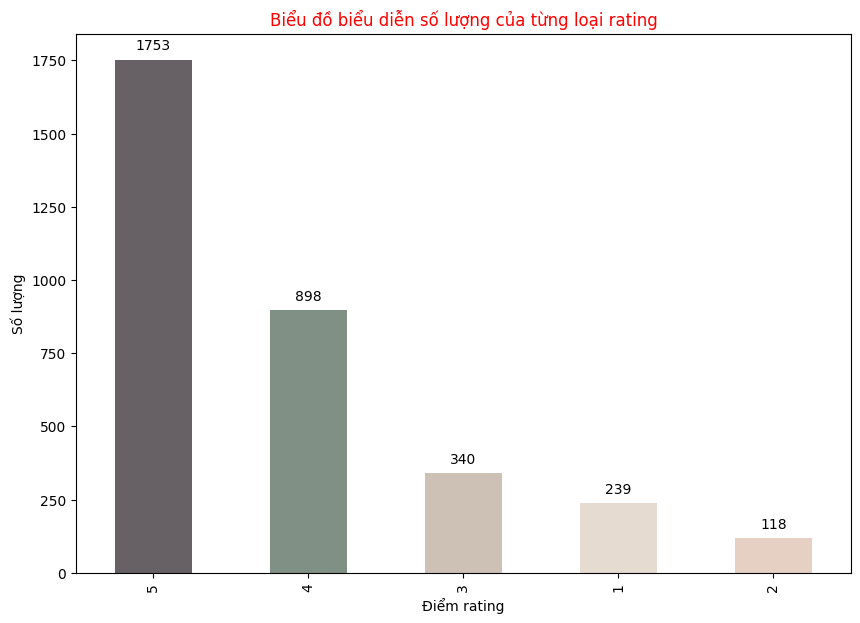

In [24]:
plt.figure(figsize=(10,7))
# Tình hình chung về rating theo từng loại:
ax = df["Review Rate"].value_counts().plot(kind='bar', color = ['#676064', '#809084', '#CDC1B6', '#E6DBD1', '#E6D0C3'])
plt.xlabel("Điểm rating")
plt.ylabel("Số lượng")
plt.title("Biểu đồ biểu diễn số lượng của từng loại rating", color = 'r')

# Thêm số lượng giá trị lên từng cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

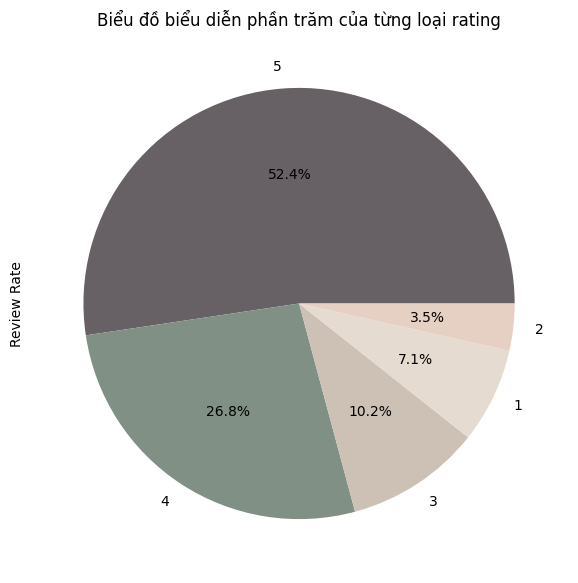

In [25]:
plt.figure(figsize=(10, 7))
cmap = mcolors.ListedColormap(['#676064', '#809084', '#CDC1B6', '#E6DBD1', '#E6D0C3'])
df["Review Rate"].value_counts().plot(kind='pie', colormap=cmap,autopct='%1.1f%%')
plt.title("Biểu đồ biểu diễn phần trăm của từng loại rating")
plt.show()

In [26]:
def calculate_average_rating(dataframe):
   return round(dataframe['Review Rate'].mean(),3)

avg_rating_df = calculate_average_rating(df)
print("Điểm rating trung bình của tất cả quán cà phê trong 5 năm trở lại đây :", avg_rating_df)

Điểm rating trung bình của tất cả quán cà phê trong 5 năm trở lại đây : 4.137


In [27]:
# Tạo các danh sách con dựa trên điều kiện
df1_2022_2023 = df[df['Review Time'].str.match(r'\d{1,2}/2022|\d{1,2}/2023')]
df2_2021_2022 = df[df['Review Time'] == '2021-2022']
df3_2020_2021 = df[df['Review Time'] == '2020-2021']
df4_2019_2020 = df[df['Review Time'] == '2019-2020']
df5_2018_2019 = df[df['Review Time'] == '2018-2019']

In [28]:
# Sử dụng hàm calculate_average_rating cho các DataFrame khác nhau
avg_rating_df1 = calculate_average_rating(df1_2022_2023)
avg_rating_df2 = calculate_average_rating(df2_2021_2022)
avg_rating_df3 = calculate_average_rating(df3_2020_2021)
avg_rating_df4 = calculate_average_rating(df4_2019_2020)
avg_rating_df5 = calculate_average_rating(df5_2018_2019)

print("Điểm rating trung bình của tất cả quán cà phê trong năm 2022-2023: ", avg_rating_df1)
print("Điểm rating trung bình của tất cả quán cà phê trong năm 2021-2022: ", avg_rating_df2)
print("Điểm rating trung bình của tất cả quán cà phê trong năm 2020-2021: ", avg_rating_df3)
print("Điểm rating trung bình của tất cả quán cà phê trong năm 2019-2020: ", avg_rating_df4)
print("Điểm rating trung bình của tất cả quán cà phê trong năm 2018-2019: ", avg_rating_df5)

Điểm rating trung bình của tất cả quán cà phê trong năm 2022-2023:  3.986
Điểm rating trung bình của tất cả quán cà phê trong năm 2021-2022:  4.046
Điểm rating trung bình của tất cả quán cà phê trong năm 2020-2021:  4.107
Điểm rating trung bình của tất cả quán cà phê trong năm 2019-2020:  4.221
Điểm rating trung bình của tất cả quán cà phê trong năm 2018-2019:  4.253


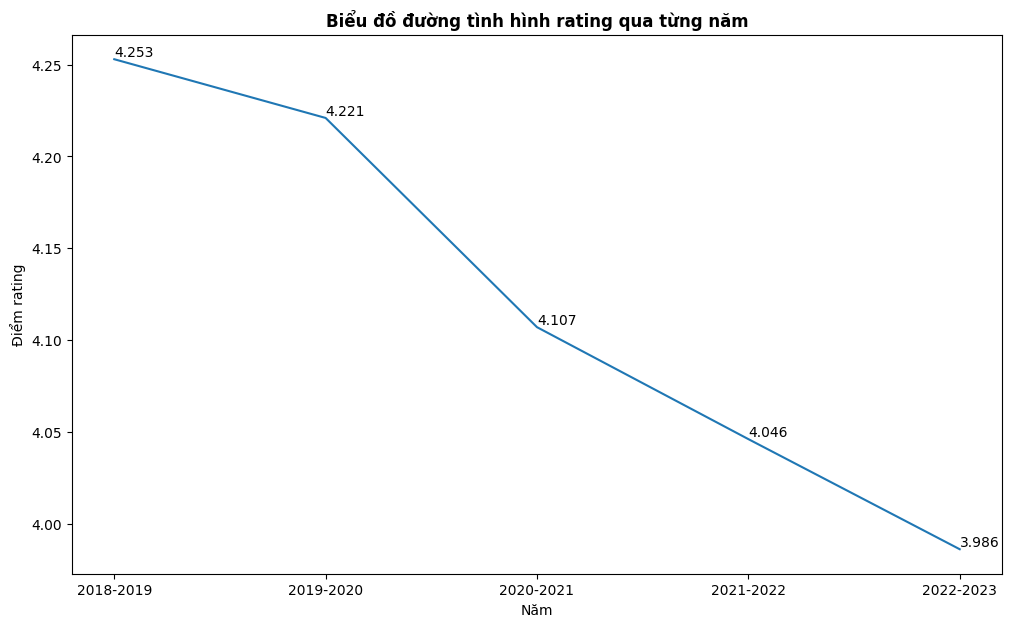

In [29]:

# Điểm trung bình theo từng năm
x = [avg_rating_df5, avg_rating_df4, avg_rating_df3, avg_rating_df2, avg_rating_df1]

# Năm từ 2018 đến 2023
years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

plt.figure(figsize=(12,7))
plt.plot(years, x)
for i in range(len(years)):
    plt.text(years[i], x[i], str(x[i]), va='bottom')
plt.ylabel('Điểm rating')
plt.xlabel('Năm')
plt.title('Biểu đồ đường tình hình rating qua từng năm',weight='bold')

plt.show()

object


<ipython-input-31-114c879da52c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2022_2023['Review Time'] = pd.to_datetime(df1_2022_2023['Review Time'])


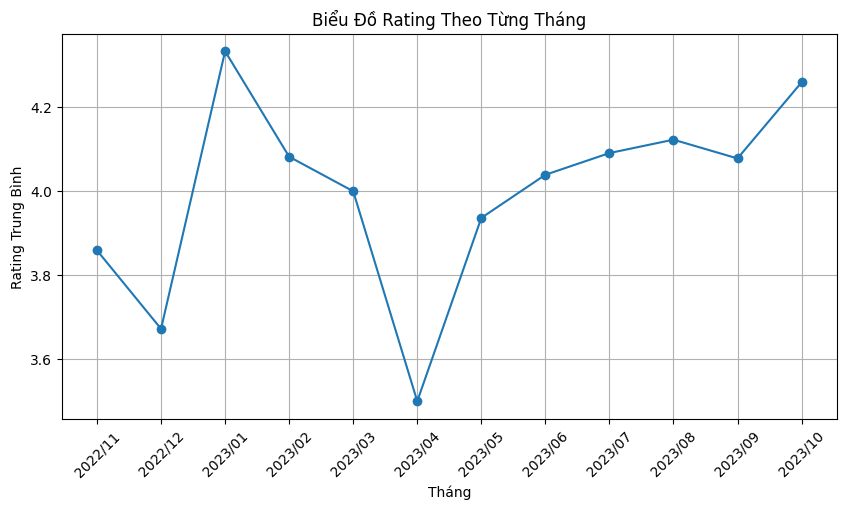

In [31]:
# Kiểm tra kiểu dữ liệu của cột "Review Time"
print(df1_2022_2023['Review Time'].dtype)

# Nếu kiểu dữ liệu không phải là datetime, bạn cần chuyển đổi nó thành datetime trước
df1_2022_2023['Review Time'] = pd.to_datetime(df1_2022_2023['Review Time'])

# Tính trung bình rating cho từng tháng
monthly_avg_rating = df1_2022_2023.groupby(df1_2022_2023['Review Time'].dt.strftime('%Y/%m'))["Review Rate"].mean()

# Sắp xếp theo thời gian
monthly_avg_rating = monthly_avg_rating.sort_index()

# Tạo biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_rating.index, monthly_avg_rating.values, marker='o', linestyle='-')
plt.xlabel('Tháng')
plt.ylabel('Rating Trung Bình')
plt.title('Biểu Đồ Rating Theo Từng Tháng')
plt.xticks(rotation=45)
plt.grid(True)

#SENTIMENT

In [32]:
df_sen = df.copy()
df_sen.dropna(inplace = True)

In [96]:
df_sen.head()

Review Rate Review Time                                     Review Comment  \
0            5      9/2023  Quán này mình thấy ưng nhất trong chuỗi HL từ ...   
1            5      6/2023  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...   
2            5      4/2023  Không gian rất thoáng nên không bị quá ồn ào, ...   
3            4      8/2023  Quán gần nhà, không gian thoáng view nhìn ra đ...   
4            5      8/2023  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...   

   Sentiment  
0          1  
1          1  
2          1  
3          1  
4          1

In [195]:
df_sen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 3693
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review Rate     1872 non-null   int64 
 1   Review Time     1872 non-null   object
 2   Review Comment  1872 non-null   object
 3   Sentiment       1872 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 137.7+ KB


In [34]:
# Khởi tạo tokenizer và model
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")
model = AutoModelForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")

# Khởi tạo VnCoreNLP word segmenter
rdrsegmenter = VnCoreNLP("/content/drive/MyDrive/VnCoreNLP/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')


In [35]:
# Dữ liệu không gắn nhãn
unlabeled_data = df_sen['Review Comment'].tolist()

# Tiền xử lý và tách từ với VnCoreNLP
unlabeled_data = [' '.join(rdrsegmenter.tokenize(ud)[0]) for ud in unlabeled_data]

# Mã hóa dữ liệu
encoded_input = tokenizer(unlabeled_data, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Đưa dữ liệu qua model
with torch.no_grad():
    outputs = model(**encoded_input)

# Lấy kết quả phân loại cảm xúc từ outputs
sentiments = torch.argmax(outputs.logits, dim=-1)

# `sentiments` bây giờ chứa kết quả phân loại cảm xúc cho dữ liệu không gắn nhãn

In [97]:
df_sen['Sentiment'] = sentiments
df_sen.to_csv("Sentiment_HL.csv", index=False)

In [104]:
df_senti = df_sen.copy()
df_senti.head()

Review Rate Review Time                                     Review Comment  \
0            5      9/2023  Quán này mình thấy ưng nhất trong chuỗi HL từ ...   
1            5      6/2023  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...   
2            5      4/2023  Không gian rất thoáng nên không bị quá ồn ào, ...   
3            4      8/2023  Quán gần nhà, không gian thoáng view nhìn ra đ...   
4            5      8/2023  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...   

   Sentiment  
0          1  
1          1  
2          1  
3          1  
4          1

In [98]:
df_sentiment = pd.read_csv("/content/Sentiment_HL.csv", index_col=0)

## Overview sentiment

In [42]:
'''
Trong đó:
+ Negative: 0
+ Positive: 1
+ Neutral: 2
'''

'\nTrong đó:\n+ Negative: 0\n+ Positive: 1\n+ Neutral: 2\n'

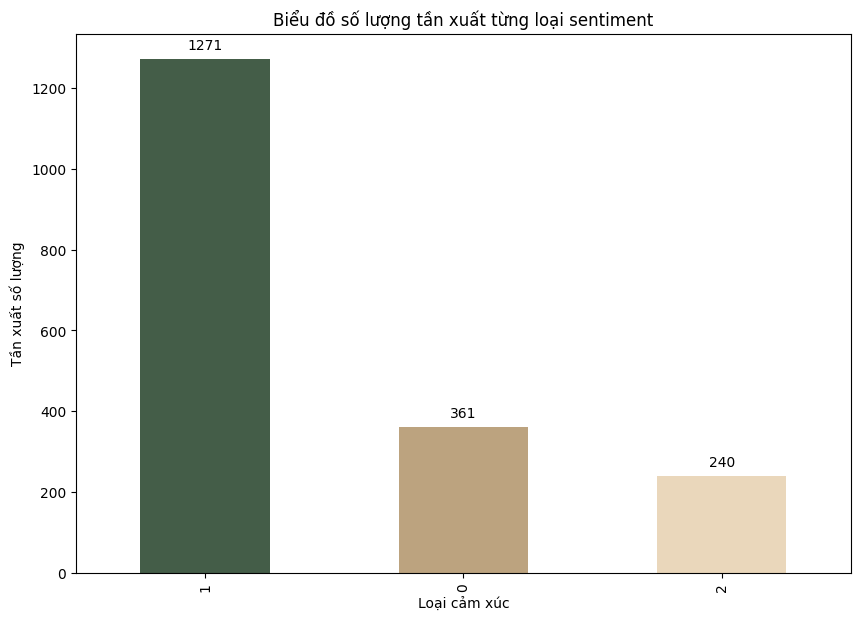

In [105]:
plt.figure(figsize=(10,7))
ax = df_senti['Sentiment'].value_counts().plot(kind='bar', color = ['#445D48', '#BCA37F', '#EAD7BB'])
plt.xlabel("Loại cảm xúc")
plt.ylabel("Tần xuất số lượng")
plt.title("Biểu đồ số lượng tần xuất từng loại sentiment")

# Thêm số lượng giá trị lên từng cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

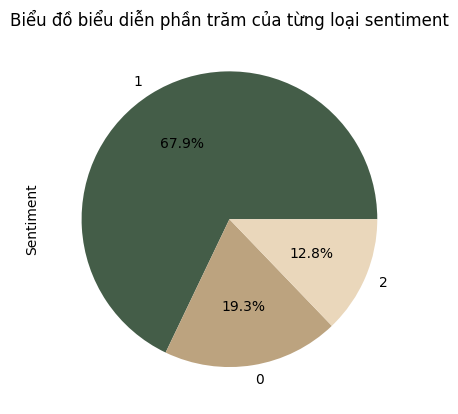

In [106]:
cmap = mcolors.ListedColormap(['#445D48', '#BCA37F', '#EAD7BB'])
df_senti['Sentiment'].value_counts().plot(kind='pie', colormap=cmap,autopct='%1.1f%%')
plt.title("Biểu đồ biểu diễn phần trăm của từng loại sentiment")
plt.show()

##Rating and sentiment

In [107]:
df_senti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 3693
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review Rate     1872 non-null   int64 
 1   Review Time     1872 non-null   object
 2   Review Comment  1872 non-null   object
 3   Sentiment       1872 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.1+ KB


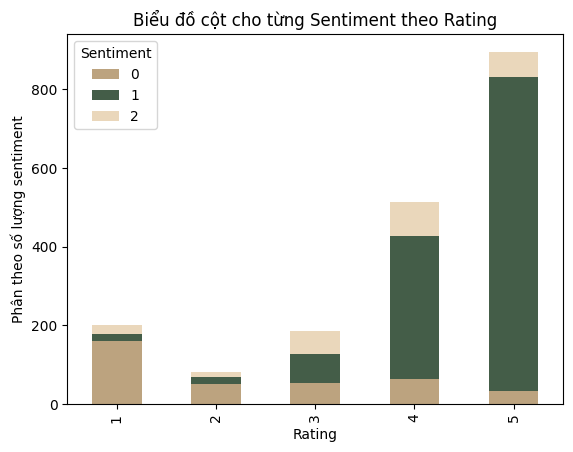

In [190]:
# Màu cho các biến sentiment
colors = ['#BCA37F', '#445D48', '#EAD7BB']

# Group dữ liệu theo Rating và Sentiment, sau đó tính tổng rating cho mỗi cặp Rating và Sentiment
grouped = df_senti.groupby(['Review Rate', 'Sentiment']).size().unstack(fill_value=0)

# Vẽ biểu đồ cột
ax = grouped.plot(kind='bar', stacked=True, color=colors)  # Sử dụng tham số color để đặt màu
ax.legend(title='Sentiment')

plt.title('Biểu đồ cột cho từng Sentiment theo Rating')
plt.xlabel('Rating')
plt.ylabel('Phân theo số lượng sentiment')

plt.show()


#VISUALIZATION

In [123]:
df_text = df_senti.copy()

In [124]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 3693
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review Rate     1872 non-null   int64 
 1   Review Time     1872 non-null   object
 2   Review Comment  1872 non-null   object
 3   Sentiment       1872 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 137.7+ KB


In [125]:
df_text.head()

Review Rate Review Time                                     Review Comment  \
0            5      9/2023  Quán này mình thấy ưng nhất trong chuỗi HL từ ...   
1            5      6/2023  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...   
2            5      4/2023  Không gian rất thoáng nên không bị quá ồn ào, ...   
3            4      8/2023  Quán gần nhà, không gian thoáng view nhìn ra đ...   
4            5      8/2023  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...   

   Sentiment  
0          1  
1          1  
2          1  
3          1  
4          1

In [126]:
# Duyệt qua các dòng trong cột 'Review Comment'
reviews = []
for i in df_text['Review Comment']:
    # Tiền xử lý và tách từ với gensim và VnCoreNLP
    lines = gensim.utils.simple_preprocess(str(i))
    lines = ' '.join(lines)
    lines = rdrsegmenter.tokenize(lines)
    # Nối các từ lại thành một chuỗi và thêm vào danh sách reviews
    lines = [' '.join(sentence) for sentence in lines]
    reviews.append(' '.join(lines))

df_text['sentence'] = reviews

def read_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file]
    return stopwords

stopwords1 = read_stopwords('/content/vietnamese-stopwords-dash.txt')
stopwords2 = read_stopwords('/content/vietnamese-stopwords.txt')

# Kết hợp danh sách stopwords từ hai tập tin
stopwords = stopwords1 + stopwords2

# Remove Stopwords
def remove_stopwords(text,stopwords):
  words = text.split()  # Tách thành từng từ
  filtered_words = [word for word in words if word not in stopwords]
  filtered_text = " ".join(filtered_words)
  return filtered_text

# Loại bỏ các từ dừng khỏi cột 'sentence'
df_text['sentence'] = df_text['sentence'].apply(lambda x: remove_stopwords(x, stopwords))
df_text.head()

Review Rate Review Time                                     Review Comment  \
0            5      9/2023  Quán này mình thấy ưng nhất trong chuỗi HL từ ...   
1            5      6/2023  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...   
2            5      4/2023  Không gian rất thoáng nên không bị quá ồn ào, ...   
3            4      8/2023  Quán gần nhà, không gian thoáng view nhìn ra đ...   
4            5      8/2023  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...   

   Sentiment                                           sentence  
0          1  quán ưng chuỗi hl nhân_viên thu_ngân pha_chế p...  
1          1  không_gian thoáng mát chỗ hơi muỗi chích đi tố...  
2          1  không_gian thoáng ồn_ào làm_việc nói_chuyện bì...  
3          1        quán không_gian thoáng view đường thoải_mái  
4          1     khu satra bãi xe ké bóng mát_mẻ phòng điều_hoà

In [127]:
df_text['tokens'] = df_text['sentence'].str.split()
del df_text['sentence']

In [169]:
df_text.head()

Review Rate Review Time                                     Review Comment  \
0            5      9/2023  Quán này mình thấy ưng nhất trong chuỗi HL từ ...   
1            5      6/2023  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...   
2            5      4/2023  Không gian rất thoáng nên không bị quá ồn ào, ...   
3            4      8/2023  Quán gần nhà, không gian thoáng view nhìn ra đ...   
4            5      8/2023  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...   

   Sentiment                                             tokens  
0          1  [quán, ưng, chuỗi, hl, nhân_viên, thu_ngân, ph...  
1          1  [không_gian, thoáng, mát, chỗ, hơi, muỗi, chíc...  
2          1  [không_gian, thoáng, ồn_ào, làm_việc, nói_chuy...  
3          1  [quán, không_gian, thoáng, view, đường, thoải_...  
4          1  [khu, satra, bãi, xe, ké, bóng, mát_mẻ, phòng,...

##Visualize những từ xuất hiện nhiều nhất

In [129]:
df_vis = df_text.copy()

In [168]:
df_vis.head()

Review Rate Review Time                                     Review Comment  \
0            5      9/2023  Quán này mình thấy ưng nhất trong chuỗi HL từ ...   
1            5      6/2023  Không gian thoáng mát nhiều chỗ ngồi. Mình ngồ...   
2            5      4/2023  Không gian rất thoáng nên không bị quá ồn ào, ...   
3            4      8/2023  Quán gần nhà, không gian thoáng view nhìn ra đ...   
4            5      8/2023  Ở trong khu satra, có bãi xe, ké bóng cây lớn ...   

   Sentiment                                             tokens  
0          1  [quán, ưng, chuỗi, hl, nhân_viên, thu_ngân, ph...  
1          1  [không_gian, thoáng, mát, chỗ, hơi, muỗi, chíc...  
2          1  [không_gian, thoáng, ồn_ào, làm_việc, nói_chuy...  
3          1  [quán, không_gian, thoáng, view, đường, thoải_...  
4          1  [khu, satra, bãi, xe, ké, bóng, mát_mẻ, phòng,...

In [131]:
def count(token_lists):
    word_counts = Counter()

    # Đếm số lượng các tokens có trong doc
    appears_in_docs = Counter()

    total_docs = len(token_lists) #Lưu trữ tổng số văn bản trong data

    for token_list in token_lists:
        # Đếm số lần xuất hiện của mỗi từ trong toàn bộ văn bản
        word_counts.update(token_list)
        # Cập nhật để đếm số văn bản mà mỗi từ xuất hiện
        appears_in_docs.update(set(token_list))

    # Tạo một dataFrame 'wc' để lưu trữ thông tin về số lần xuất hiện của từng từ
    word_count_dict = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(word_count_dict, columns = ['word', 'count'])

    # Xếp hạng các từ theo số lần xuất hiện
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum() #Tổng số lần xuất hiện của tất cả các từ

    # Tính phần trăm tổng số lần xuất hiện của từ đó so với tổng của tất cả các từ
    wc['fraction_of_total'] = wc['count'].apply(lambda token_count: token_count / total * 100)

    # Tạo dataframe 'ac' để lưu số văn bản mà mỗi từ xuất hiện
    t2 = zip(appears_in_docs.keys(), appears_in_docs.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in_docs'])

    # Bảng wc kết hợp vs ac thông qua cột 'word' để có biết mỗi từ xuất hiện và tính % của văn bản mà mỗi từ xuất hiện
    wc = ac.merge(wc, on='word')

    wc['appears_in_fraction_of_docs'] = wc['appears_in_docs'].apply(lambda x: x / total_docs * 100)

    return wc.sort_values(by='rank')

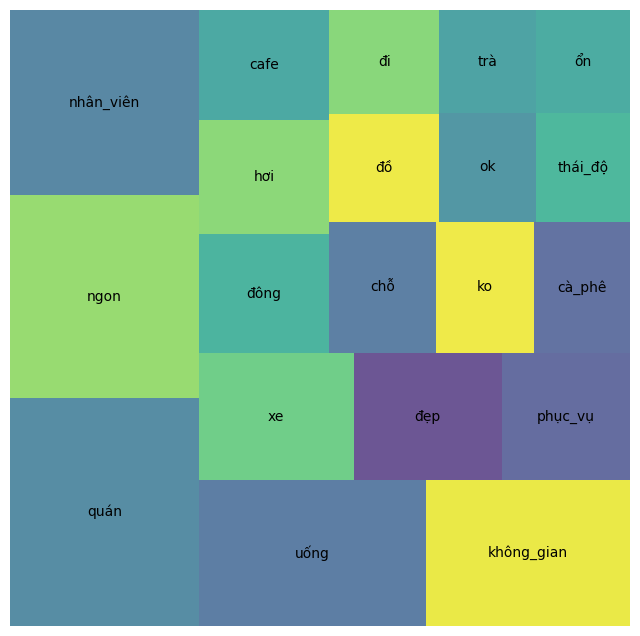

In [132]:
wc = count(df_vis['tokens'])
wc_top20 = wc[wc['rank']<= 20]
plt.figure(figsize=(8, 8))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [133]:
wc_top20

word  appears_in_docs  count  rank  fraction_of_total  \
3          quán              335    388   1.0           3.566504   
154        ngon              341    345   2.0           3.171247   
14    nhân_viên              279    315   3.0           2.895487   
76         uống              280    299   4.0           2.748414   
40   không_gian              261    269   5.0           2.472654   
29           xe              124    178   6.0           1.636180   
223         đẹp              165    170   7.0           1.562644   
11      phục_vụ              140    147   8.0           1.351227   
30         đông              133    140   9.0           1.286883   
28          hơi              126    135  10.0           1.240923   
71         cafe              115    130  11.0           1.194963   
19          chỗ              114    126  12.0           1.158195   
37           ko               93    116  13.0           1.066274   
121      cà_phê              103    114  14.0           1.047890   
151          đồ              103    106  15.0           0.974354   
32           đi               89    103  16.0           0.946778   
139          ok               93     95  17.0           0.873242   
231     thái_độ               83     92  18.0           0.845666   
70          trà               75     90  19.0           0.827282   
53           ổn               85     88  20.0           0.808898   

     appears_in_fraction_of_docs  
3                      17.895299  
154                    18.215812  
14                     14.903846  
76                     14.957265  
40                     13.942308  
29                      6.623932  
223                     8.814103  
11                      7.478632  
30                      7.104701  
28                      6.730769  
71                      6.143162  
19                      6.089744  
37                      4.967949  
121                     5.502137  
151                     5.502137  
32                      4.754274  
139                     4.967949  
231                     4.433761  
70                      4.006410  
53                      4.540598

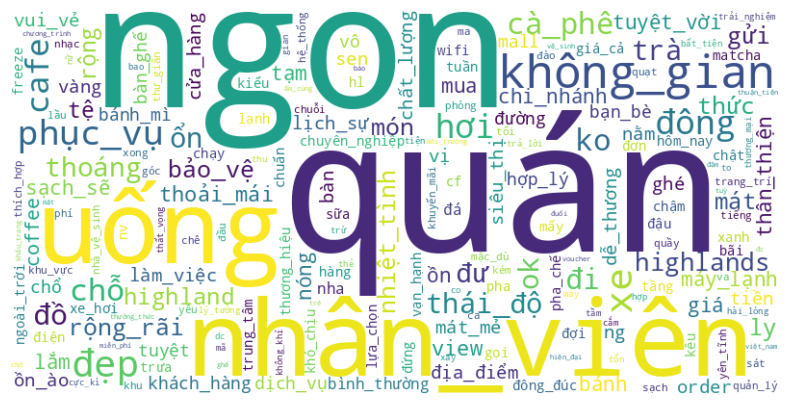

In [134]:
wc_data = count(df_vis['tokens'])

# Tạo một DataFrame chứa các từ và số lần xuất hiện
word_counts_df = pd.DataFrame({'word': wc_data['word'], 'count': wc_data['count']})

# Tạo một dicionary từ DataFrame để vẽ Word Cloud
word_counts_dict = word_counts_df.set_index('word')['count'].to_dict()

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_dict)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## So sánh giữa các reviews theo Sentiment

In [135]:
df_tokens = df_text.copy()

In [136]:
df_tokens

Review Rate Review Time  \
0               5      9/2023   
1               5      6/2023   
2               5      4/2023   
3               4      8/2023   
4               5      8/2023   
5               1      4/2023   
6               5      9/2023   
7               1      9/2023   
8               1      6/2023   
9               5   2021-2022   
10              1      9/2023   
11              5      2/2023   
12              5   2019-2020   
13              2      6/2023   
15              4   2021-2022   
16              2      5/2023   
17              5   2021-2022   
18              4   2019-2020   
21              1   2021-2022   
22              4      2/2023   
24              1      5/2023   
25              5      5/2023   
26              1      5/2023   
28              5   2021-2022   
29              5   2018-2019   
30              4      2/2023   
31              1      5/2023   
32              3      2/2023   
33              2      2/2023   
34              5   2019-2020   
35              2   2018-2019   
36              4   2019-2020   
37              5      8/2023   
38              1      8/2023   
39              1      4/2023   
40              2      4/2023   
41              5   2020-2021   
42              5   2021-2022   
43              3   2018-2019   
44              4   2021-2022   
45              2      4/2023   
46              3   2020-2021   
47              1      4/2023   
48              5   2019-2020   
49              4   2019-2020   
50              2      2/2023   
51              4   2021-2022   
52              5      9/2023   
53              1      1/2023   
54              4   2019-2020   
55              5   2018-2019   
56              4      9/2023   
57              1   2020-2021   
58              4      2/2023   
59              5   2019-2020   
60              4   2018-2019   
61              4      1/2023   
62              4   2018-2019   
63              5   2021-2022   
64              1   2021-2022   
65              4   2021-2022   
66              5   2020-2021   
68              1   2021-2022   
69              3     11/2022   
70              5      4/2023   
71              1     12/2022   
72              1     12/2022   
73              2   2021-2022   
74              5   2020-2021   
75              5   2021-2022   
76              1      6/2023   
77              1     12/2022   
78              5   2019-2020   
79              1      5/2023   
80              4   2018-2019   
81              5   2021-2022   
82              5   2020-2021   
83              1   2021-2022   
85              1     11/2022   
86              5   2021-2022   
87              4   2021-2022   
90              2   2021-2022   
91              3   2018-2019   
92              1   2021-2022   
93              5   2021-2022   
94              2   2021-2022   
97              1   2021-2022   
98              4   2021-2022   
99              1     12/2022   
100             1   2021-2022   
101             4   2021-2022   
102             1   2021-2022   
103             3   2019-2020   
104             5      1/2023   
105             1     11/2022   
106             5   2018-2019   
107             5      9/2023   
108             4   2018-2019   
109             1   2020-2021   
110             5     11/2022   
111             1   2018-2019   
112             4      9/2023   
113             1   2021-2022   
115             1      2/2023   
116             5   2018-2019   
118             5   2021-2022   
119             3   2019-2020   
120             5   2020-2021   
121             5      3/2023   
122             2   2019-2020   
123             5   2020-2021   
124             1     12/2022   
125             3   2019-2020   
127             5   2020-2021   
128             5   2021-2022   
131             2   2018-2019   
132             4   2020-2021   
133             1   2020-2021   
134             1   2020-2021   
135             1   2019-2020   
136          

In [137]:
positive = df_tokens[df_tokens['Sentiment'] == 1]
negative = df_tokens[df_tokens['Sentiment'] == 0]
neutral =  df_tokens[df_tokens['Sentiment'] == 2]

In [138]:
# Kiểm tra điều kiện trong một chương trình Python. Cụ thể, nó đang kiểm tra xem số hàng (dòng) trong DataFrame df_tokens có bằng tổng số hàng trong các DataFrame positive, negative, và neutral hay không
assert df_tokens.shape[0] == positive.shape[0] + negative.shape[0] + neutral.shape[0]

###Review positive

#### Kiếm những từ xuất hiện nhiều trong bình luận positive

In [139]:
positive_wc = count(positive["tokens"])
positive_wc.head(10)

word  appears_in_docs  count  rank  fraction_of_total  \
110        ngon              322    325   1.0           4.939960   
3          quán              216    246   2.0           3.739170   
40   không_gian              225    232   3.0           3.526372   
93         uống              217    229   4.0           3.480772   
152         đẹp              162    167   5.0           2.538380   
14    nhân_viên              139    148   6.0           2.249582   
139        cafe               89     98   7.0           1.489588   
11      phục_vụ               89     92   8.0           1.398389   
88       cà_phê               79     88   9.0           1.337589   
107          đồ               84     87  10.0           1.322389   

     appears_in_fraction_of_docs  
110                    25.334382  
3                      16.994493  
40                     17.702596  
93                     17.073171  
152                    12.745869  
14                     10.936271  
139                     7.002360  
11                      7.002360  
88                      6.215578  
107                     6.608969

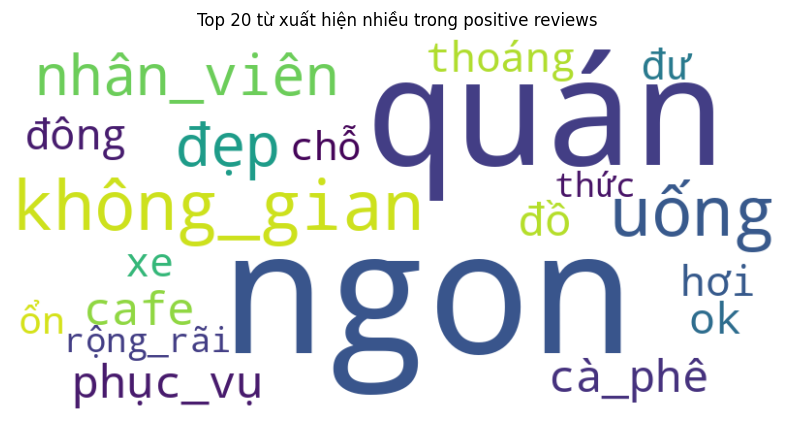

In [140]:
# Sắp xếp DataFrame theo số lần xuất hiện giảm dần
positive_top20 = positive_wc.head(20)

# Tạo một dictionary từ dataframe
word_count_dict = dict(zip(positive_top20['word'], positive_top20['count']))

# Tạo biểu đồ Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Hiển thị biểu đồ Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top 20 từ xuất hiện nhiều trong positive reviews")
plt.axis('off')
plt.show()

#### Từ đó liên quan tới vấn đề gì

In [196]:
train_data0 = positive.tokens.tolist() #Tạo danh sách chứa từ khoá của SENTIMENT positive
len(train_data0)

1271

In [197]:
# Được sử dụng để cấu hình logging để theo dõi quá trình huấn luyện mô hình Word2Vec.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [201]:
# Model word2vec
model_pos = Word2Vec(train_data0, vector_size = 100, window = 5, min_count = 1, workers = 4, sg = 1)

In [198]:
# Trả về số lượng từ vựng trong mô hình Word2Vec đã được tạo.
len(model_pos.wv.key_to_index)

1283

In [199]:
#Trả về một từ điển chứa các từ trong từ vựng của mô hình và chỉ mục tương ứng của chúng.
model_pos.wv.key_to_index

{'ngon': 0,
 'quán': 1,
 'không_gian': 2,
 'uống': 3,
 'đẹp': 4,
 'nhân_viên': 5,
 'cafe': 6,
 'phục_vụ': 7,
 'cà_phê': 8,
 'đồ': 9,
 'ok': 10,
 'đông': 11,
 'đư': 12,
 'thoáng': 13,
 'hơi': 14,
 'xe': 15,
 'chỗ': 16,
 'ổn': 17,
 'rộng_rãi': 18,
 'trà': 19,
 'thức': 20,
 'mát': 21,
 'nhiệt_tình': 22,
 'view': 23,
 'highlands': 24,
 'thoải_mái': 25,
 'tuyệt_vời': 26,
 'highland': 27,
 'rộng': 28,
 'đi': 29,
 'ko': 30,
 'món': 31,
 'sạch_sẽ': 32,
 'thân_thiện': 33,
 'giá': 34,
 'bánh': 35,
 'gửi': 36,
 'làm_việc': 37,
 'ly': 38,
 'coffee': 39,
 'chất_lượng': 40,
 'dễ_thương': 41,
 'tuyệt': 42,
 'địa_điểm': 43,
 'sen': 44,
 'mát_mẻ': 45,
 'bảo_vệ': 46,
 'nằm': 47,
 'máy_lạnh': 48,
 'bàn': 49,
 'bạn_bè': 50,
 'ghé': 51,
 'lịch_sự': 52,
 'ồn_ào': 53,
 'hợp_lý': 54,
 'vui_vẻ': 55,
 'lắm': 56,
 'trung_tâm': 57,
 'chi_nhánh': 58,
 'vị': 59,
 'mall': 60,
 'mua': 61,
 'dịch_vụ': 62,
 'ồn': 63,
 'vàng': 64,
 'ngoài_trời': 65,
 'thương_hiệu': 66,
 'giá_cả': 67,
 'siêu_thị': 68,
 'chuẩn': 69,
 'nha

In [202]:
word_to_find = ["ngon","quán","không_gian"]

In [203]:
# Tìm các từ tương tự cho từng từ khoá word_to_find:
for word in word_to_find:
    similar_words = model_pos.wv.similar_by_word(word)
    print("/////////////////////")
    print(f"Các từ tương tự của '{word}':")
    for similar_word, similarity_score in similar_words:
        print(f"{similar_word}: {similarity_score}")

/////////////////////
Các từ tương tự của 'ngon':
ko: 0.9980214238166809
đi: 0.997794508934021
highland: 0.9977702498435974
quán: 0.9977090358734131
bàn: 0.9976317882537842
chỗ: 0.9975363612174988
nóng: 0.9975297451019287
đông: 0.9974833130836487
trà: 0.9974507093429565
ng: 0.997441291809082
/////////////////////
Các từ tương tự của 'quán':
highland: 0.998117983341217
ly: 0.9980405569076538
hơi: 0.9980229139328003
ko: 0.9979332685470581
ng: 0.9979103207588196
đi: 0.9979032874107361
bàn: 0.9978480339050293
bảo_vệ: 0.9978015422821045
ghé: 0.9977902770042419
đông: 0.9977487921714783
/////////////////////
Các từ tương tự của 'không_gian':
siêu_thị: 0.997891366481781
đi: 0.9978626370429993
cafe: 0.9978322386741638
cà_phê: 0.9976934790611267
làm_việc: 0.997594952583313
đông: 0.9975860714912415
nhân_viên: 0.9975646734237671
ko: 0.997515857219696
highland: 0.9974660873413086
ly: 0.9974228739738464


### Review negative

#### Kiếm những từ xuất hiện nhiều trong bình luận negative

In [148]:
negative_wc = count(negative["tokens"])
negative_wc.head(10)

word  appears_in_docs  count  rank  fraction_of_total  \
12   nhân_viên              118    139   1.0           4.839833   
32        quán               81     97   2.0           3.377437   
80     thái_độ               63     72   3.0           2.506964   
27          xe               39     60   4.0           2.089136   
31          tệ               49     51   5.0           1.775766   
84          ko               38     51   6.0           1.775766   
97     phục_vụ               46     49   7.0           1.706128   
130         đi               36     43   8.0           1.497214   
11        uống               36     39   9.0           1.357939   
186       đông               33     35  10.0           1.218663   

     appears_in_fraction_of_docs  
12                     32.686981  
32                     22.437673  
80                     17.451524  
27                     10.803324  
31                     13.573407  
84                     10.526316  
97                     12.742382  
130                     9.972299  
11                      9.972299  
186                     9.141274

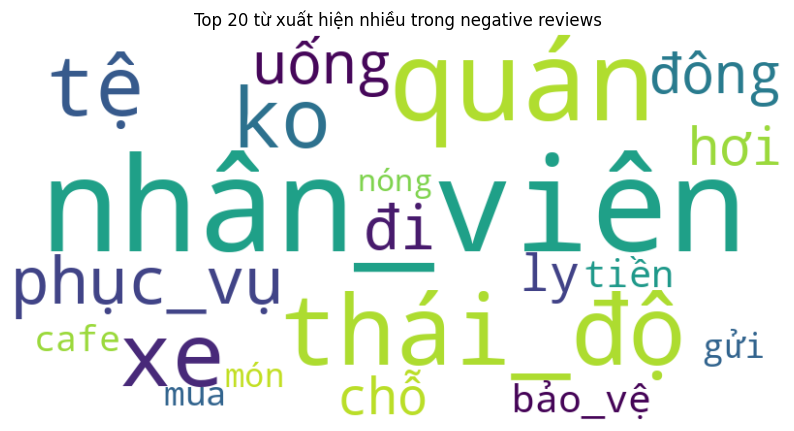

In [149]:
# Sắp xếp DataFrame theo số lần xuất hiện giảm dần
negative_top20 = negative_wc.head(20)

# Tạo một dictionary từ dataframe
word_count_dict = dict(zip(negative_top20['word'], negative_top20['count']))

# Tạo biểu đồ Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Hiển thị biểu đồ Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top 20 từ xuất hiện nhiều trong negative reviews")
plt.axis('off')
plt.show()

#### Từ đó liên quan tới vấn đề gì

In [150]:
train_data1 = negative.tokens.tolist()
len(train_data1)

361

In [151]:
model_neg = Word2Vec(train_data1, vector_size = 100, window = 5, min_count = 1, workers = 4, sg = 1)

In [152]:
len(model_neg.wv.key_to_index)

914

In [153]:
model_neg.wv.key_to_index

{'nhân_viên': 0,
 'quán': 1,
 'thái_độ': 2,
 'xe': 3,
 'ko': 4,
 'tệ': 5,
 'phục_vụ': 6,
 'đi': 7,
 'uống': 8,
 'đông': 9,
 'hơi': 10,
 'ly': 11,
 'chỗ': 12,
 'bảo_vệ': 13,
 'tiền': 14,
 'cafe': 15,
 'gửi': 16,
 'mua': 17,
 'món': 18,
 'nóng': 19,
 'ồn': 20,
 'order': 21,
 'trà': 22,
 'vô': 23,
 'chi_nhánh': 24,
 'quản_lý': 25,
 'kêu': 26,
 'chậm': 27,
 'highlands': 28,
 'khách_hàng': 29,
 'lắm': 30,
 'kém': 31,
 'bàn_ghế': 32,
 'không_gian': 33,
 'ngon': 34,
 'xong': 35,
 'cà_phê': 36,
 'máy_lạnh': 37,
 'bánh_mì': 38,
 'đơn': 39,
 'khó_chịu': 40,
 'chật': 41,
 'đậu': 42,
 'wifi': 43,
 'pha_chế': 44,
 'highland': 45,
 'gọi': 46,
 'đợi': 47,
 'ghé': 48,
 'điện': 49,
 'trả_lời': 50,
 'đá': 51,
 'thất_vọng': 52,
 'nv': 53,
 'đuổi': 54,
 'đầu': 55,
 'mấy': 56,
 'ca': 57,
 'đứng': 58,
 'nhạc': 59,
 'kiểu': 60,
 'mặc_dù': 61,
 'chuyên_nghiệp': 62,
 'hàng': 63,
 'bình_thường': 64,
 'chạy': 65,
 'ồn_ào': 66,
 'hoá_đơn': 67,
 'quầy': 68,
 'thân_thiện': 69,
 'freeze': 70,
 'đồ': 71,
 'mong': 72,

In [154]:
word_to_find = ["tệ","nhân_viên","quán","thái_độ"]

In [155]:
for word in word_to_find:
    similar_words = model_neg.wv.similar_by_word(word)
    print("/////////////////////")
    print(f"Các từ tương tự của '{word}':")
    for similar_word, similarity_score in similar_words:
        print(f"{similar_word}: {similarity_score}")

/////////////////////
Các từ tương tự của 'tệ':
ly: 0.90805584192276
thái_độ: 0.9044150114059448
ko: 0.8970740437507629
quán: 0.8952729105949402
xe: 0.8948020935058594
nhân_viên: 0.8911041021347046
mua: 0.8889247179031372
uống: 0.8833213448524475
bánh: 0.8819595575332642
quầy: 0.8803312182426453
/////////////////////
Các từ tương tự của 'nhân_viên':
ly: 0.9464205503463745
thái_độ: 0.9450235962867737
quán: 0.9421160221099854
đi: 0.9305326342582703
ko: 0.9280268549919128
uống: 0.9260905981063843
xong: 0.9221639037132263
mua: 0.922062337398529
xe: 0.9194949269294739
hôm_nay: 0.9178779721260071
/////////////////////
Các từ tương tự của 'quán':
thái_độ: 0.9425156116485596
nhân_viên: 0.9421160221099854
ly: 0.9415447115898132
mua: 0.9340441823005676
xe: 0.9293044805526733
ko: 0.9269528985023499
uống: 0.9260505437850952
món: 0.9184523224830627
đi: 0.9138686656951904
hôm_nay: 0.9098653197288513
/////////////////////
Các từ tương tự của 'thái_độ':
ly: 0.9530677795410156
nhân_viên: 0.945023596286

### Neutral reviews

#### Kiếm những từ xuất hiện nhiều trong bình luận neutral

In [156]:
neutral_wc = count(neutral["tokens"])
neutral_wc.head(10)

word  appears_in_docs  count  rank  fraction_of_total  \
12         quán               38     45   1.0           3.151261   
21           xe               28     44   2.0           3.081232   
54         uống               27     31   3.0           2.170868   
109         tạm               30     31   4.0           2.170868   
8     nhân_viên               22     28   5.0           1.960784   
14          chỗ               25     28   6.0           1.960784   
93          hơi               25     28   7.0           1.960784   
78   không_gian               24     25   8.0           1.750700   
43         đông               23     24   9.0           1.680672   
71           ko               18     24  10.0           1.680672   

     appears_in_fraction_of_docs  
12                     15.833333  
21                     11.666667  
54                     11.250000  
109                    12.500000  
8                       9.166667  
14                     10.416667  
93                     10.416667  
78                     10.000000  
43                      9.583333  
71                      7.500000

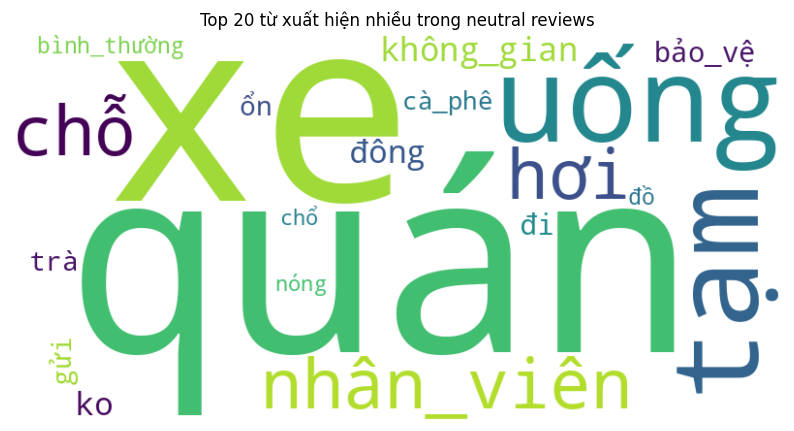

In [157]:
# Sắp xếp DataFrame theo số lần xuất hiện giảm dần
neutral_top20 = neutral_wc.head(20)

# Tạo một dictionary từ dataframe
word_count_dict = dict(zip(neutral_top20['word'], neutral_top20['count']))

# Tạo biểu đồ Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Hiển thị biểu đồ Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top 20 từ xuất hiện nhiều trong neutral reviews")
plt.axis('off')
plt.show()

#### Những từ đó liên quan tới vấn đề gì

In [221]:
train_data2 = neutral.tokens.tolist()
len(train_data2)

240

In [222]:
model_neu = Word2Vec(train_data2, vector_size = 100, window = 5, min_count = 1, workers = 4, sg = 1)

In [223]:
len(model_neu.wv.key_to_index)

590

In [224]:
model_neu.wv.key_to_index

{'quán': 0,
 'xe': 1,
 'tạm': 2,
 'uống': 3,
 'nhân_viên': 4,
 'hơi': 5,
 'chỗ': 6,
 'không_gian': 7,
 'đông': 8,
 'ko': 9,
 'đi': 10,
 'bảo_vệ': 11,
 'gửi': 12,
 'ổn': 13,
 'trà': 14,
 'cà_phê': 15,
 'bình_thường': 16,
 'đồ': 17,
 'nóng': 18,
 'chổ': 19,
 'ồn': 20,
 'cafe': 21,
 'highlands': 22,
 'order': 23,
 'ngon': 24,
 'rộng': 25,
 'đá': 26,
 'thái_độ': 27,
 'giá': 28,
 'phí': 29,
 'chi_nhánh': 30,
 'ok': 31,
 'ng': 32,
 'bánh': 33,
 'nha': 34,
 'nhà_vệ_sinh': 35,
 'siêu_thị': 36,
 'thu': 37,
 'bàn': 38,
 'lắm': 39,
 'coffee': 40,
 'sữa': 41,
 'cửa_hàng': 42,
 'chạy': 43,
 'kêu': 44,
 'phục_vụ': 45,
 'máy_lạnh': 46,
 'quầy': 47,
 'ly': 48,
 'tui': 49,
 'nhiệt_tình': 50,
 'kiểu': 51,
 'nằm': 52,
 'đậu': 53,
 'vô': 54,
 'đứng': 55,
 'cf': 56,
 'tuần': 57,
 'highland': 58,
 'địa_điểm': 59,
 'mua': 60,
 'lầu': 61,
 'xanh': 62,
 'thẻ': 63,
 'thông_báo': 64,
 'lịch_sự': 65,
 'dc': 66,
 'sen': 67,
 'bàn_ghế': 68,
 'sân': 69,
 'quạt': 70,
 'xíu': 71,
 'báo': 72,
 'bánh_mì': 73,
 'tiếng': 

In [225]:
word_to_find = ["quán","xe","uống","nhân_viên"]
for word in word_to_find:
    similar_words = model_neu.wv.similar_by_word(word)
    print("/////////////////////")
    print(f"Các từ tương tự của '{word}':")
    for similar_word, similarity_score in similar_words:
        print(f"{similar_word}: {similarity_score}")

/////////////////////
Các từ tương tự của 'quán':
báo: 0.4602504074573517
ko: 0.4509839713573456
sạch_sẽ: 0.39934781193733215
món: 0.38250428438186646
đi: 0.3675096333026886
bố_trí: 0.3631821274757385
bảo_vệ: 0.3477112650871277
chi_nhánh: 0.3465645909309387
bình_thường: 0.3363089859485626
lịch_sự: 0.33086156845092773
/////////////////////
Các từ tương tự của 'xe':
hiện_đại: 0.3648311495780945
món: 0.3552665114402771
trà: 0.3384890556335449
kiểu: 0.32587185502052307
nóng: 0.3241053521633148
uống: 0.32241013646125793
sen: 0.31666767597198486
order: 0.30687645077705383
highlands: 0.3023349940776825
bảo_vệ: 0.3017154633998871
/////////////////////
Các từ tương tự của 'uống':
hơi: 0.41636866331100464
báo: 0.40253859758377075
bánh_mì: 0.3728558123111725
bảo_vệ: 0.36870047450065613
trà: 0.3576696515083313
đi: 0.351126104593277
cf: 0.34776076674461365
xíu: 0.34269580245018005
trừ: 0.3414020240306854
tiện: 0.3364580273628235
/////////////////////
Các từ tương tự của 'nhân_viên':
hơi: 0.39759978

### Xem sự xuất hiện giữa các từ đó giữa các sentiment

In [163]:
words = ['quán', 'thái_độ', 'ngon', 'nhân_viên', 'không_gian','xe','uống']

In [164]:
df_pos_keywords_mask = positive_wc.word.isin(words)
df_pos_keywords = positive_wc[df_pos_keywords_mask]
df_pos_keywords.head()

word  appears_in_docs  count  rank  fraction_of_total  \
110        ngon              322    325   1.0           4.939960   
3          quán              216    246   2.0           3.739170   
40   không_gian              225    232   3.0           3.526372   
93         uống              217    229   4.0           3.480772   
14    nhân_viên              139    148   6.0           2.249582   

     appears_in_fraction_of_docs  
110                    25.334382  
3                      16.994493  
40                     17.702596  
93                     17.073171  
14                     10.936271

In [165]:
df_neg_keywords_mask = negative_wc.word.isin(words)
df_neg_keywords = negative_wc[df_neg_keywords_mask]
df_neg_keywords.head()

word  appears_in_docs  count  rank  fraction_of_total  \
12  nhân_viên              118    139   1.0           4.839833   
32       quán               81     97   2.0           3.377437   
80    thái_độ               63     72   3.0           2.506964   
27         xe               39     60   4.0           2.089136   
11       uống               36     39   9.0           1.357939   

    appears_in_fraction_of_docs  
12                    32.686981  
32                    22.437673  
80                    17.451524  
27                    10.803324  
11                     9.972299

In [166]:
df_neu_keywords_mask = neutral_wc.word.isin(words)
df_neu_keywords = neutral_wc[df_neu_keywords_mask]
df_neu_keywords.head()

word  appears_in_docs  count  rank  fraction_of_total  \
12        quán               38     45   1.0           3.151261   
21          xe               28     44   2.0           3.081232   
54        uống               27     31   3.0           2.170868   
8    nhân_viên               22     28   5.0           1.960784   
78  không_gian               24     25   8.0           1.750700   

    appears_in_fraction_of_docs  
12                    15.833333  
21                    11.666667  
54                    11.250000  
8                      9.166667  
78                    10.000000

<Axes: title={'center': 'Neutral: Phần trăm xuất hiện các từ có trong review neutral'}, xlabel='word', ylabel='appears_in_fraction_of_docs'>

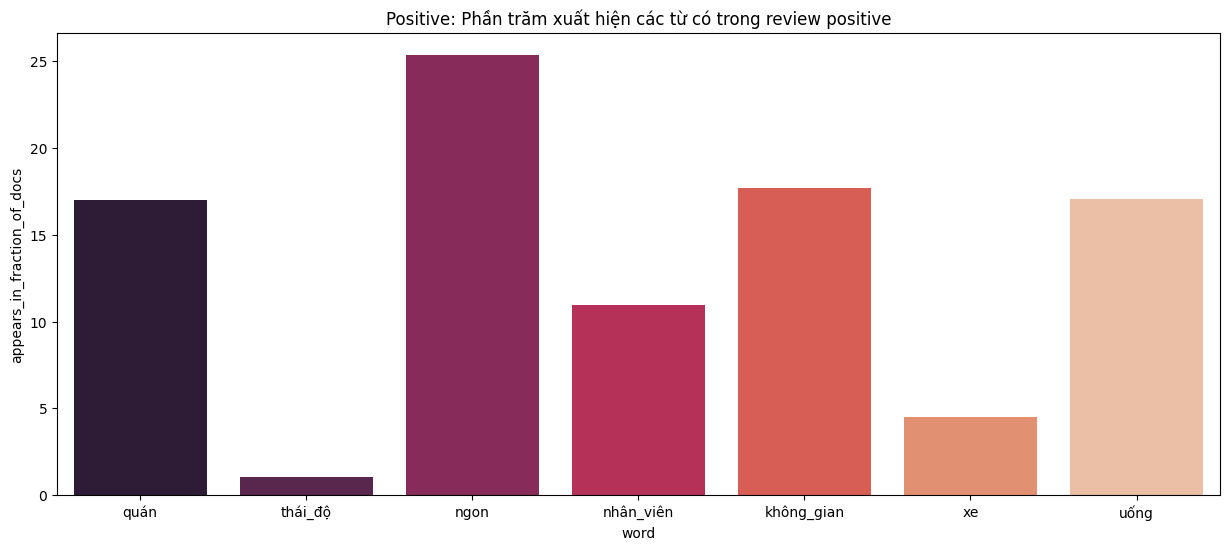

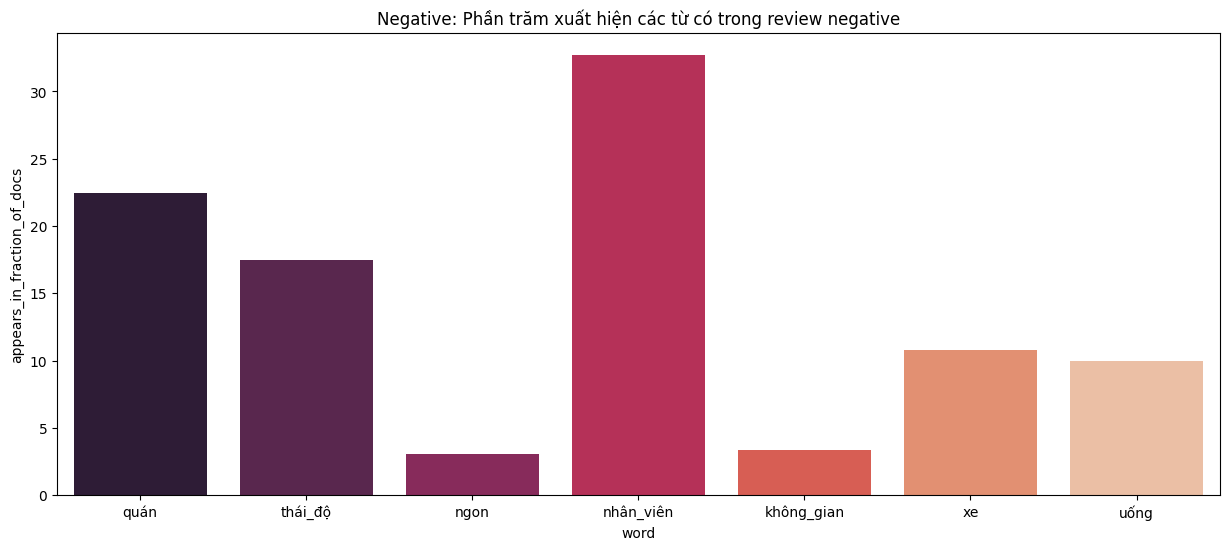

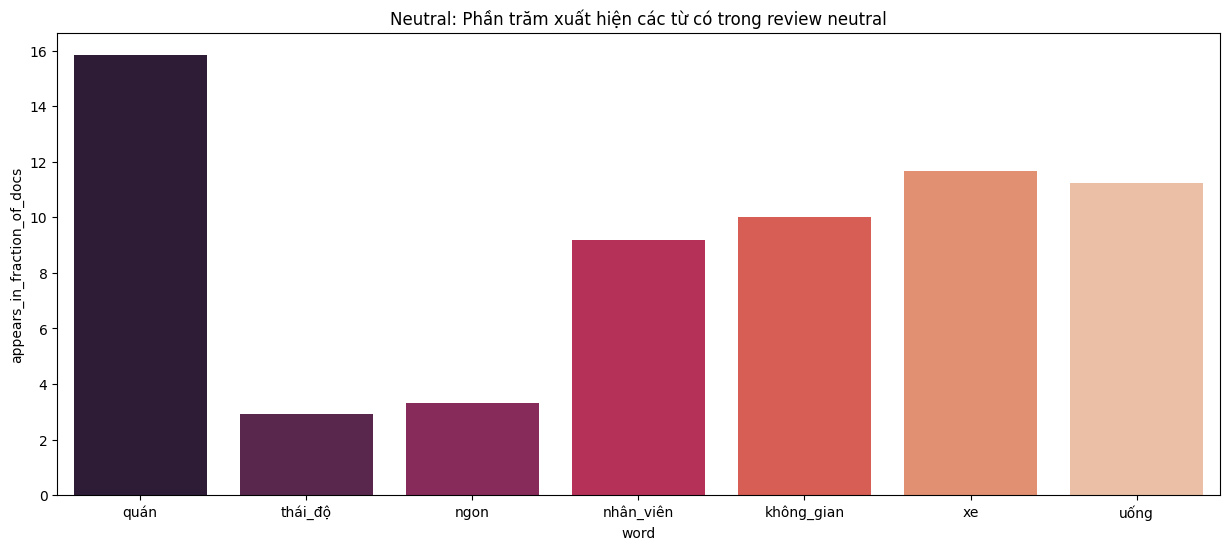

In [226]:
# Biểu đồ positive
plt.figure(figsize=(15,6))
plt.title("Positive: Phần trăm xuất hiện các từ có trong review positive")
sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=words)


# Biểu đồ negative
plt.figure(figsize=(15,6))
plt.title("Negative: Phần trăm xuất hiện các từ có trong review negative")
sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=words)

# Biểu đồ neutral
plt.figure(figsize=(15,6))
plt.title("Neutral: Phần trăm xuất hiện các từ có trong review neutral")
sns.barplot(x=df_neu_keywords.word, y=df_neu_keywords.appears_in_fraction_of_docs, palette="rocket", order=words)
